# Homework 4

## James Jefferies

Instructions: 

1. Replace "yourname" in the title of this notebook, and "your name here" in this header, with your name. 
2. Complete all questions/problems. **Make sure to run all cells so that your output is visible**. You can usually do this by choosing "restart & run all" from the Kernel menu. 
3. Email me your notebook (.ipynb file) to jonathan.reeve@columbia.edu, with the subject "yourname - HW4," replacing "yourname" with your name. Please don't email me archives (`.zip` or `.tar.gz`). 

### 1. Install SpaCy and the SpaCy language model called `en_core_web_lg`. It is important that you get this particular language model, as the others don't have the features we'll need. 

You can work together in groups (probably in groups where you all run the same operating system). 

There are installation instructions [here on the SpaCy website](https://spacy.io/usage/) that list a number of command-line commands to run. To run command-line commands: 

 - **Linux**: open a terminal. 
 - **MacOS**: open the Terminal app. (Hint: you can open Spotlight, the magnifying glass icon in the upper right, and type "terminal")
 - **Windows**: open Powershell. (Open the Start menu, then type "powershell.") Alternatively, download Git BASH, which is included in GitHub Desktop. 

Whenever you see command-line commands, they're usually prefixed with `$` or `#`. A `$` means to run the command as a regular user, and a `#` means to prefix your command with `sudo`. You'll generally only see `$`, and you're already running as a regular user, so all you'll need to do is to type in the command that follows the `$`, i.e. not including the `$`. So if the command is shown in the SpaCy docs as `$ conda install -c conda-forge spacy`, open a terminal and type `conda install -c conda-forge spacy`, exactly as written. 

When following the SpaCy instructions, you'll want to choose `conda` as your package manager (because you've installed Anaconda), and 'python3' as your Python version, since we're using Python 3 in this course. Don't select `virtualenv` unless you really know what you're doing. 

To show that you've successfully installed this stack, please run the two cells below, to show that it's not giving you errors. 

In [7]:
import spacy
import os
import nltk
from collections import Counter


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd

import seaborn as sns


import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
# nlp = spacy.load('en_core_web_lg')

### 2. Create the corpus that you'll use for your final project, load it into this notebook, put it into a single variable (e.g., a dictionary), and show some basic text statistics. 
 
Feel free to use [corpus-db.org](http://corpus-db.org) to assemble your corpus. If you need any help in using it, please ask in the chatroom! You can use it to get, say, 30 detective novels relatively easily, or 30 novels that feature young women, or 30 novels set in Paris. You can also get all the works by a certain author this way. But be careful to know exactly what texts you're getting. Project Gutenberg includes texts in a number of languages, prune your texts carefully. 

Stick with English texts, please. NLP in other languages is possible, but requires a different set of tokenizers and other tools that we haven't used yet in this course. It's also good idea to work with texts that are originally written in English, since translations have the problem of introducing translator's word choices to the set of word choices that the author has already made.

Your corpus should be a collection of texts, stored in one variable. However, it doesn't have to be a collection of *works*. Rather, it can be all the narratives in _The Moonstone_, all of Katherine Mansfield's stories, all of Joyce's stories, or some combination of the above, based on theme or genre. It can also be all the novels of a certain writer, or of five writers. 

Comparisons make for good corpora. Why not compare, say, all of our Joyce stories to all of our Mansfield stories? 

You can also use certain APIs to get texts like book reviews from sites like Goodreads. Use `requests.get` along with a URL you get from the API's documentation. Maybe you're interested in comparing texts with book reviews? 

Your corpus might change a little by the time you finish your final project, and that's OK, but try not to change it completely, if you can. 

Make sure to clean your corpus of paratext: tables of contents, Project Gutenberg copyright licenses, etc, since these will throw off text statistics. 

Show at least three types of text statistics, like: 
 - Length of each text or text segment, in words. 
 - Titles (labels) for each text or text segment. 
 - Type/token ratio of each text or text segment. What do you notice here? 
 - Collocations and/or frequent content n-grams for each. What do you notice? 
 - A pattern like JJ-JJ-JJ-NN, or 'like a JJ NN'.
 - Anything else you're interested in knowing/showing about this corpus. 

**Include at least one paragraph of markdown where you describe your exploratory analysis.**

In [14]:
# Helpful functions
def removePunctuation(text):
    """Remove punctuation"""
    for punct in "`!@#$%^&*():;-’“”,\n\xa0.?\"\'–":
        text = text.replace(punct, ' ')
    return text

def preProcessTexts(text):
    """Lower case text and remove punctuation"""
    lowerText = text.lower()
    return removePunctuation(lowerText)

# Helper function to output neatly
def formatOutput(name, value):
    """Neat output of name and value"""
    print(f"{value} {name}")
    
# TTR function
def typeTokenRatio(dictionary):
    """Calculate the type token ratios for a dictionary of texts"""
    dictionary = typeTokenRatioDict(dictionary)
    sortedDictionary = sortByValue(dictionary)
    for name, entry in sortedDictionary.items():  
        print(f"{entry} {name}")  
        
def calculateTTR(tokens):
    numTokens = len(tokens)
    numTypes = len(set(tokens))  
    return (numTypes / numTokens) * 100
        
# TTR function
def typeTokenRatioDict(dictionary):
    """Calculate the type token ratios for a dictionary of texts"""  
    ttrDict = {}
    for name, tokens in dictionary.items():
        ttrDict[name] = calculateTTR(tokens)
        
    return ttrDict

def sortByValue(dictionary):
    return { title: length for title, length in sorted(dictionary.items(), key=lambda item: item[1], reverse=True)}

def dispersionPlotter(nltkText, lookupWords):
    nltkText.dispersion_plot(lookupWords)
    plt.show()  
    
def wordProportionCounter(nltkText, lookupWord):
    countLookupWord = Counter(nltkText)[lookupWord]
    totalCount = len(nltkText)
    return (countLookupWord / totalCount) * 10000
    
    
# Trigram finder
def commonNgrams(tokens, n):
    ngrams = nltk.ngrams(tokens, n)
    ngramsList = list(ngrams)
    return Counter(ngramsList).most_common(10)

def commonNgramFinder(noPunctTokens, counter=3):
    # Start it off with tri-grams, I think there is probably a better way to do this
    # without seeding the while loop. It works for now!
    thisList = commonNgrams(noPunctTokens, counter)

    while thisList[0][1] > 4:  # Once we don't get any with 4, we stop
        counter = counter + 1
        thisList = commonNgrams(noPunctTokens, counter)
    
    # Trim the list to show us the nGrams appearing 4 times or more.
    return [item for item in thisList if item[1] >= 2]


In [36]:
# Build up initial corpus from my readings directory
file_names = sorted(os.listdir('../Readings'))

fileDict = {}
for file_name in file_names:
    if file_name.endswith(".txt"):
        fileDict[file_name] = open('../readings/' + file_name, encoding='latin2').read()

imTitles = list(fileDict.keys())
imTexts = list(fileDict.values())


In [37]:
# Use dictionary comprehension to create dictionaries
preProcessedTextDict = { name: preProcessTexts(text) for name, text in fileDict.items() }  
tokenDict = { name: nltk.word_tokenize(text) for name, text in preProcessedTextDict.items() }
rawTokenDict = { name: nltk.word_tokenize(text) for name, text in fileDict.items() }
lengthsDict = { title: len(tokens) for title, tokens in rawTokenDict.items() }
textDict = { name: nltk.Text(tokens, name=name) for name, tokens in rawTokenDict.items() }

In [33]:
print("These are the token counts for the novels, including punctuation\n")
sortedLengthsDict = sortByValue(lengthsDict)

for title, length in sortedLengthsDict.items():
    print(f"{length} {title}")
    
#print("\n\nThese are the type/token ratios without the novels being truncated to the same length\n")
#typeTokenRatio(tokenDict)     
    
# Find the minimum number of words by creating a list of word counts
minimumWords = min([ len(text) for name, text in tokenDict.items()])

truncatedTokenDict = { name: text[:minimumWords] for name, text in tokenDict.items() }

print("\n\nThese are the type/token ratios with the novels being truncated to the same length and punctuation removed\n")
typeTokenRatio(truncatedTokenDict)   

# Find the minimum number of words by creating a list of word counts
minimumWords = min([ len(text) for name, text in rawTokenDict.items()])

truncatedRawTokenDict = { name: text[:minimumWords] for name, text in rawTokenDict.items() }

print("\n\nThese are the type/token ratios with the novels being truncated to the same length but with punctuation\n")
typeTokenRatio(truncatedRawTokenDict) 


These are the token counts for the novels, including punctuation

301876 1989-the-message-to-the-planet.txt
268485 1983-the-philosopher-s-pupil.txt
265216 1987-the-book-and-the-brotherhood.txt
257202 1992-metaphysics-as-a-guide-to-morals.txt
247716 1985-the-good-apprentice.txt
238337 1978-the-sea-the-sea-novel.txt
232585 1980-nuns-and-soldiers.txt
224444 1993-the-green-knight.txt
188286 1971-an-accidental-man.txt
187171 1973-the-black-prince-novel.txt
185458 1975-a-word-child.txt
180820 1970-a-fairly-honourable-defeat.txt
177106 1976-henry-and-cato.txt
165514 1974-the-sacred-and-profane-love-machine.txt
148319 1968-the-nice-and-the-good.txt
135390 1957-the-sandcastle.txt
133947 1958-the-bell.txt
133146 1962-an-unofficial-rose.txt
127797 1956-the-flight-from-the-enchanter.txt
120406 1965-the-red-and-the-green.txt
117402 1954-under-the-net.txt
112998 1969-bruno-s-dream.txt
110848 1963-the-unicorn.txt
109137 1995-jackson-s-dilemma.txt
96635 1966-time-of-the-angels.txt
88818 1961-a-severed

In [15]:
# nGram calculations for each novel
for title, tokens in tokenDict.items():
    
    print('\n' + title + '\n')
    for nGrams in commonNgramFinder(tokens, 3):
        nG = " ".join(nGrams[0])
        count = nGrams[1]
        print(f"{count} times: {nG}")


1961-a-severed-head.txt

4 times: there was nothing i could do
3 times: i don t know i said
3 times: i don t want to know
3 times: at the far end of the
3 times: i can t tell you what
3 times: when it came to it i
3 times: i sat down on the sofa
3 times: looked at my watch it was
3 times: but there was no need to
3 times: i can t tell you how

1983-the-philosopher-s-pupil.txt

3 times: the triumph of aphrodite which was to
3 times: it did not occur to her to
3 times: did not know what to do with
3 times: i will make you fishers of men
3 times: what do you want me to do
3 times: dans l onde toi devenue ta jubilation
3 times: l onde toi devenue ta jubilation nue
3 times: as a child with his uncle joseph
3 times: a child with his uncle joseph of
3 times: child with his uncle joseph of arimathea

1995-jackson-s-dilemma.txt

4 times: forgive me i am very sorry i
4 times: me i am very sorry i can
4 times: i am very sorry i can not
4 times: am very sorry i can not marry
4 times: very sorry i

In [ ]:
lowerTextDict = { title: [t.lower() for t in tokens] for title, tokens in textDict.items()}

goodProportions = { title: wordProportionCounter(text, 'good') for title, text in lowerTextDict.items() }
sortedGoodProportions = sortByValue(goodProportions)

for title, props in sortedGoodProportions.items():
    print(f"{props:.4f}      {title}")
    
# df = pd.Series(sortedGoodProportions, index=sortedGoodProportions.keys())
# df


1961-a-severed-head.txt



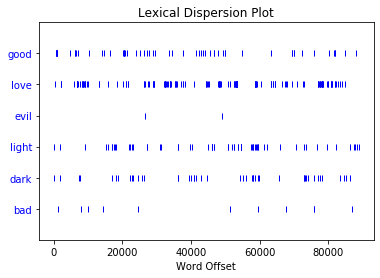


1983-the-philosopher-s-pupil.txt



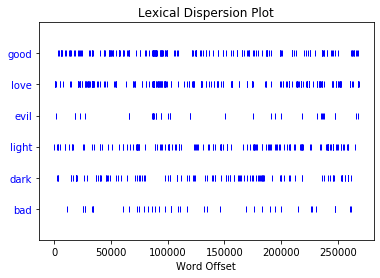


1995-jackson-s-dilemma.txt



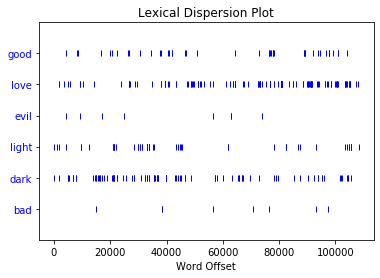


1987-the-book-and-the-brotherhood.txt



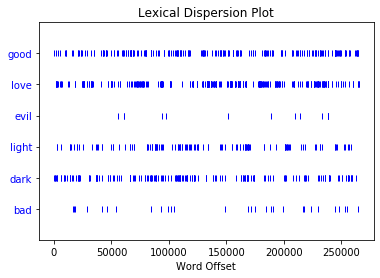


1966-time-of-the-angels.txt



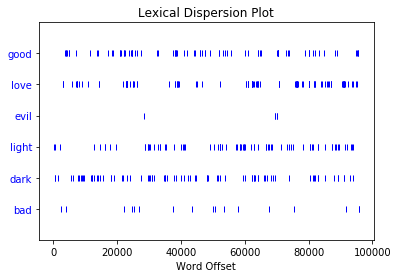


1978-the-sea-the-sea-novel.txt



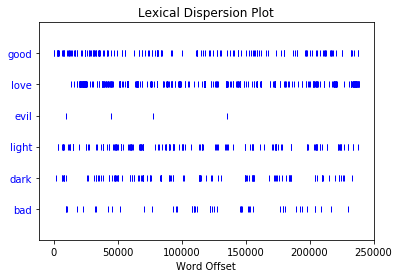


1989-the-message-to-the-planet.txt



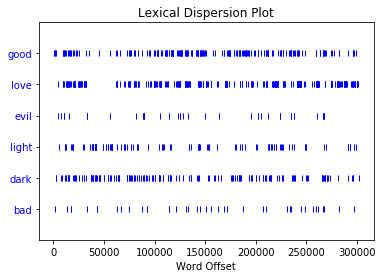


1980-nuns-and-soldiers.txt



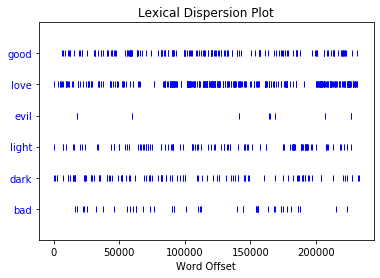


1973-the-black-prince-novel.txt



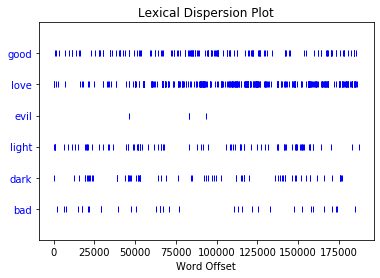


1958-the-bell.txt



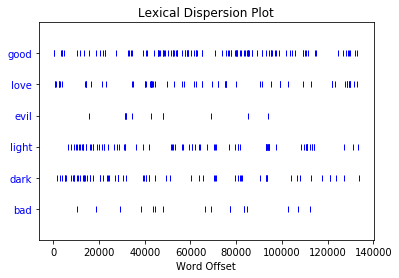


1975-a-word-child.txt



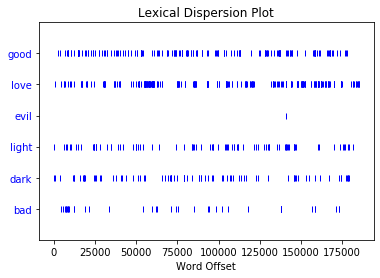


1954-under-the-net.txt



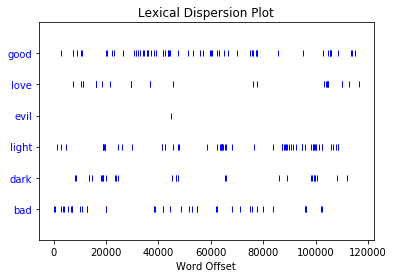


1970-a-fairly-honourable-defeat.txt



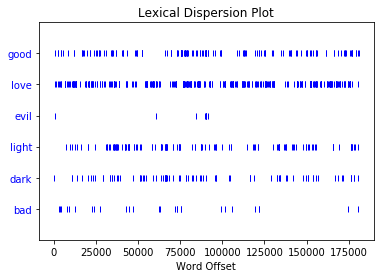


1956-the-flight-from-the-enchanter.txt



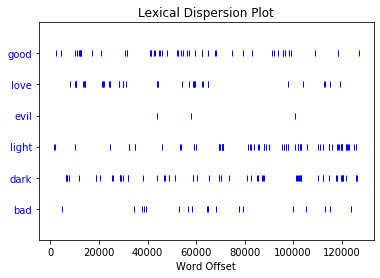


1993-the-green-knight.txt



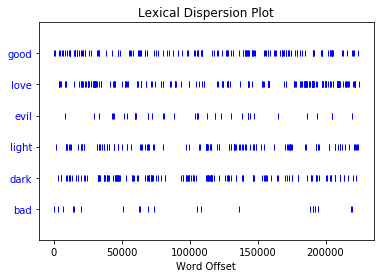


1963-the-unicorn.txt



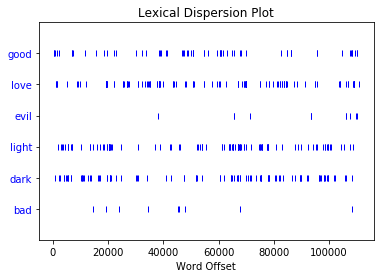


1968-the-nice-and-the-good.txt



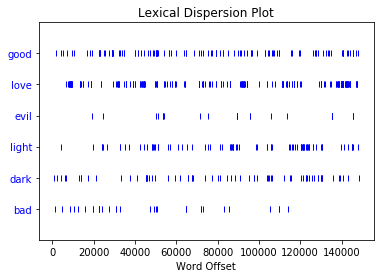


1962-an-unofficial-rose.txt



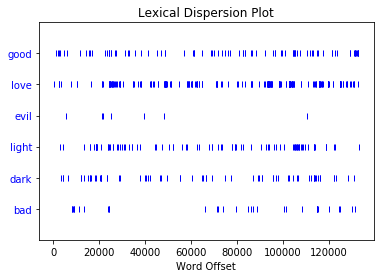


1974-the-sacred-and-profane-love-machine.txt



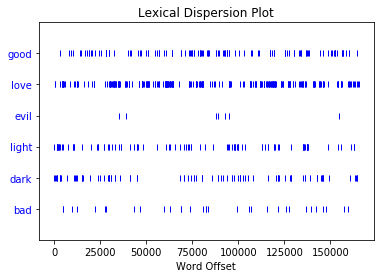


1976-henry-and-cato.txt



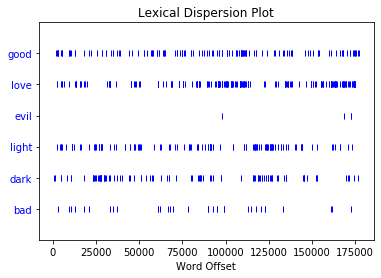


1985-the-good-apprentice.txt



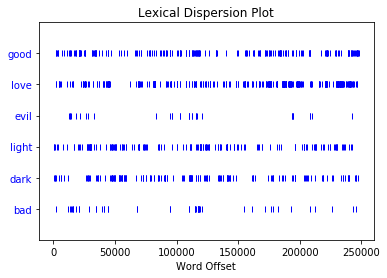


1957-the-sandcastle.txt



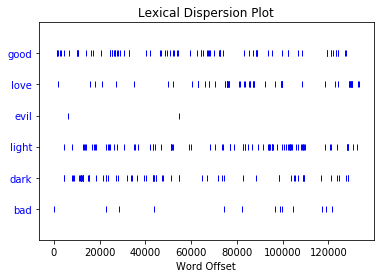


1992-metaphysics-as-a-guide-to-morals.txt



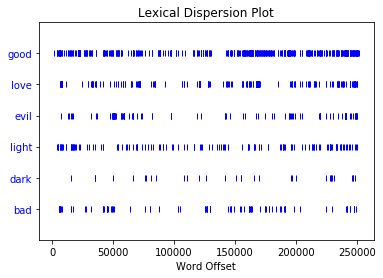


1965-the-red-and-the-green.txt



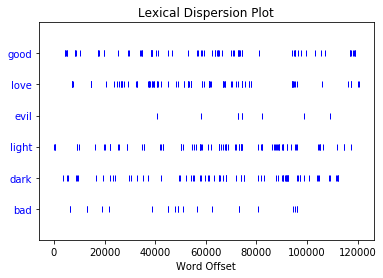


1964-the-italian-girl.txt



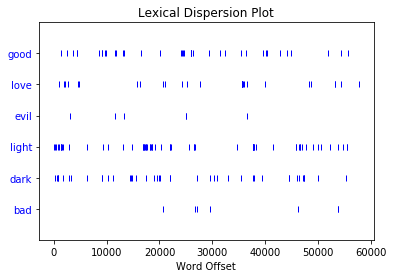


1969-bruno-s-dream.txt



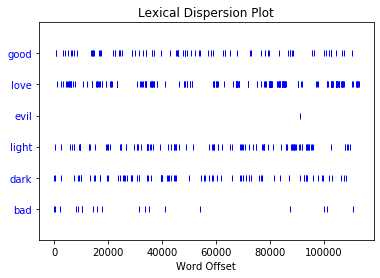


1971-an-accidental-man.txt



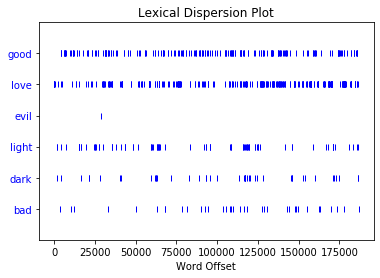

In [34]:
for title, nltkText in textDict.items():
    print(f'\n{title}\n')
    dispersionPlotter(nltkText, ['good','love', 'evil', 'light', 'dark', 'bad'])

* Word counts - I hadn’t realised that The Message To The Planet was the longest novel when it came to word counts. I thought it might have been The Book And The Brotherhood. Also, I hadn’t realised quite how short The Italian Girl was - The Message to The Planet is nearly 5 times as long!

* TTR - I think these get a bit skewed by the short Italian Girl. It would be interesting to group these by some of the common ways the novels are grouped. A lot of the longer ones would be together, and the shorter ones too. Seeing The Red And The Green at the top is a real surprise to me.

* nGrams - oh gosh, so much interest in these, surprising how many repeats there are, mod actually quite long nGrams. A lot of them really ring true too - The Sea The Sea with the sorries. Under The Net has 4 instances of ‘Out of the corner of my eye’ something which does ring true to the narrator in that novel.

* For Proportion Count - there are some words and concepts which are common throughout much of Iris Murdoch’s writing. The concept of ‘good’ is an important one to her. Which novel, proportionally, has the most good?  One the face of it, ‘A Word Child’ - I wouldn’t have expected that, but there you go! Further investigation would be interesting.

* Dispersion plots - I’ve used some of the classic Murdochian words, good, love, evil, light, dark and bad. Some of the novels are swimming in good and love, others have lots of light and dark. Again lots to investigate!



### 3. Complete ONE of the following mini-projects. 

**For each, please write at least one paragraph where you describe and explain your results in terms of the text(s) you're studying.**

1. Topic-model your corpus using LDA. What do you notice? Create a visualization of it, if you want. 
2. Explore the differences between quoted and non-quoted text in either _The Moonstone_ or in Mansfield's stories. What kinds of words/POSes appear more often in each category? Use any techniques we've learned so far. 
3. Explore the Brown Corpus, by category. What kinds of words/POSes appear more often in each category? Create a visualization or two of your explorations. 
4. Conduct a comparative stylometric analysis of a corpus of your choosing, using PCA. (Maybe the Brown Corpus, Inaugural Address Corpus, or a corpus of chapters in _The Moonstone_. According to your PCA output, which are the outliers (the most statistically dissimilar from the others)? Which are the most similar to each other? Why do you think this is? 
5. Make a simple genre categorizer that tries to guess the genre of a text, based on word frequencies derived from the Brown corpus. Test it on a few texts, like Mansfield's stories. 

(27, 400)


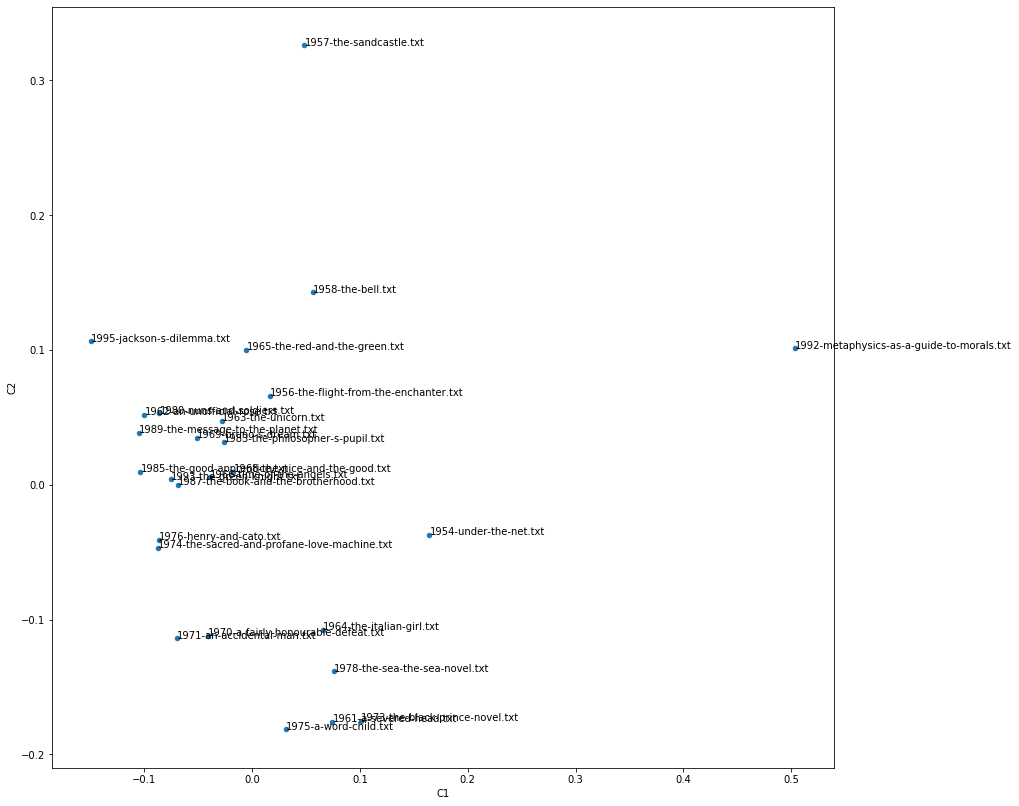

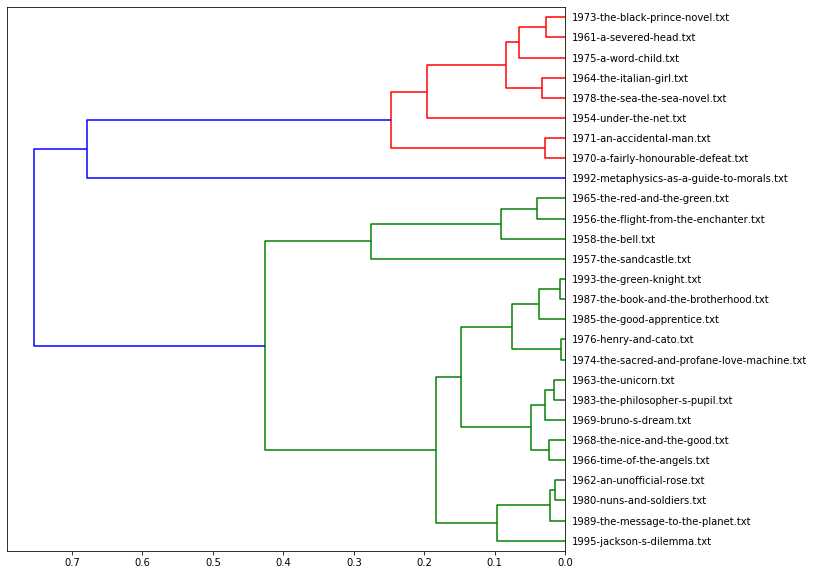

In [35]:
def plotStylometry(allTexts, allTitles, min_df=1, max_df=1.0, max_features=None):
    # Set up the vectorizer with parameters
    tfidfVectorizer = TfidfVectorizer(max_features=max_features, min_df=min_df, max_df=max_df)
    
    # Actually do the transform, allTexts is a list, so 
    # you end up with a multi-dimensional matrix
    textMatrix = tfidfVectorizer.fit_transform(allTexts)
    
    # Fill in the gaps, else it's a sparse matrix
    # to save space
    denseTextMatrix = textMatrix.todense()
    
    # For debug purposes, what is the shape of the matrix
    print(denseTextMatrix.shape)
    
    # PCA can compress the multi-dimensional matrix
    # to a 2-dimensional (in this case) matrix
    pca = PCA(n_components=2)
    textPoints = pca.fit_transform(denseTextMatrix)
    
    # Create a data frame of this two dimensional table/matrix
    # set index to be the titles and provide it with columns
    textDf = pd.DataFrame(textPoints, index=allTitles, columns=['C1','C2'])
    
    # Do a plot of the data frame - you have to give it the x, y
    ax = textDf.plot(kind='scatter', x='C1', y='C2', figsize=(14,14))

    # Annotate the points with the titles
    for title, points in textDf.iterrows():
        ax.annotate(title, points)
    
    plt.show()  
    
    links = linkage(textDf, method='ward')
    
    plt.subplots(figsize=(10, 10))
    
    _ = dendrogram(links, labels=allTitles, orientation='left')
    
    
    plt.show()
    
# plotStylometry(imTexts, imTitles, min_df=1, max_df=1.0, max_features=None)
plotStylometry(imTexts, imTitles, 1, 1.0, 400)

I've been having a play with some of the parameters for doing the stylometry, but I think I could do with more time to do further tweaking. This one isn't too bad though - I find especially interesting the dendrogram on this one, especially the bottom 6 green novels. The Sea, The Sea & The Black Prince are prize winning novels, whereas Under The Net is the very first published novel by Iris Murdoch - and one which sets out some of the templates for future ones. Seeing The Sandcastle on it's own makes a lot of sense too, it is, for me, by far the most straightforward of her novels. It sticks out on both the dendrogram and the XY plot.

In [17]:
countVectorizer = CountVectorizer(stop_words='english', max_features=1000,min_df=1, max_df=0.9)

In [18]:
imCounts = countVectorizer.fit_transform(imTexts)

In [19]:
wordLabels = countVectorizer.get_feature_names()

In [20]:
thisDf = pd.DataFrame(imCounts.todense(), index=imTitles, columns=wordLabels)

In [21]:
lda = LatentDirichletAllocation(n_components=3)

In [22]:
ldaOut = lda.fit_transform(imCounts)

In [27]:
topicWordMatrix = pd.DataFrame(lda.components_, index=['topic 1', 'topic 2', 'topic 3'], columns=wordLabels)

In [24]:
#topicWordMatrix.loc['topic 2'].sort_values(ascending=False).head(15)

In [28]:
def getWords(topicName):
    return ' '.join(list(topicWordMatrix.loc[topicName].sort_values(ascending=False).head(5).index))

In [29]:
topicLabelsWords = [getWords(topic) for topic in ['topic 1', 'topic 2', 'topic 3']]

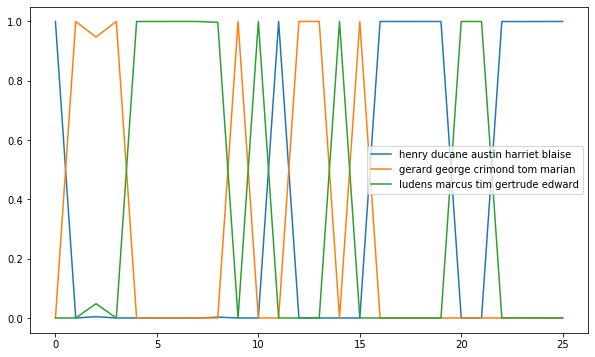

In [30]:
pd.DataFrame(ldaOut, columns=topicLabelsWords).plot(figsize=(10,6))

Just having a quick play with the LDA - I'm only really getting character names coming through here, so some of my parameters must be awry. It's pulling character names together from different novels.